In [ ]:
BIPARTITE GRAPHS 

Bipartite Graph Connections:
Node 0: [4, 5]
Node 1: [5, 4]
Node 2: [4, 6]
Node 3: [6, 4]
Node 4: [0, 1, 2, 3]
Node 5: [0, 1]
Node 6: [2, 3]


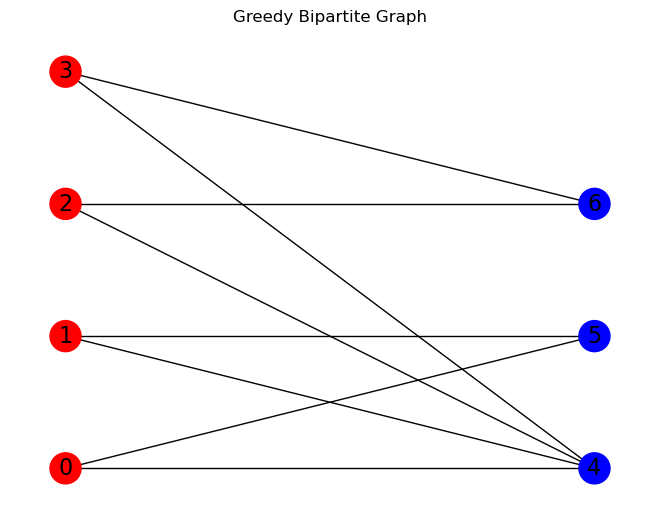

In [7]:
!pip install matplotlib networkx


import matplotlib.pyplot as plt
import networkx as nx
import random

def greedy_bipartite_graph(community_A, community_B, connections_per_node):
    graph = {node: [] for node in community_A + community_B}  # Initialize the graph

    for node in community_A:
        # Randomly select connections for the node from community_B
        available_nodes = list(community_B)  # All nodes in community B
        random.shuffle(available_nodes)  # Shuffle to ensure randomness
        
        # Connect to the first `connections_per_node` available nodes in community B
        for i in range(min(connections_per_node, len(available_nodes))):
            graph[node].append(available_nodes[i])
            graph[available_nodes[i]].append(node)  # Ensure the connection is bidirectional

    return graph

def draw_graph(graph):
    G = nx.Graph()
    
    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Create a color map for visualization
    color_map = ['red' if node in community_A else 'blue' for node in G.nodes()]

    # Manually position nodes: left for community A, right for community B
    pos = {}
    for i, node in enumerate(community_A):
        pos[node] = (-1, i)  # Community A positions (left)
    
    for i, node in enumerate(community_B):
        pos[node] = (1, i)  # Community B positions (right)

    # Draw the graph
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=16)
    plt.title("Greedy Bipartite Graph")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define two separate communities with flexible sizes
    community_A = [0, 1, 2, 3]  # First community 
    community_B = [4, 5, 6]      # Second community
    
    connections_per_node = 2  # Define how many connections each node in community A can have
    
    # Create the bipartite graph using a greedy algorithm
    graph = greedy_bipartite_graph(community_A, community_B, connections_per_node)
    
    print("Bipartite Graph Connections:")
    for node, neighbors in graph.items():
        print(f"Node {node}: {neighbors}")

    draw_graph(graph)
